# Basic script to plot the necessary data distributions in PUMML dataset
Datasets are downloaded from https://zenodo.org/record/2652034#.YFesYBP0nlw.

This could be easily adopted to plot other distributions

In [47]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
hep.set_style(hep.style.CMS)

In [2]:
filepath = "../puppi/PUMMLEventsByMu_mH500.h5"
# events by different number of pileup interactions (mu)
events_by_mu = h5py.File(filepath)
print(events_by_mu.attrs['col_names'])

[b'pt' b'eta' b'phi' b'charged' b'vertex' b'puppi_weight' b'sk_weight'
 b'truth_jet' b'reco_jet']


In [3]:
# take the events where number of pileup is 50
events = events_by_mu['50']
# but you can get an actual numpy array (this involves actually reading data from disk and loading it into memory)
events = events[()]
events.shape
# 2000 events, each event has 327 particles, each particle has 9 features
# zero padded if nParticle is less than 327

(2000, 327, 9)

In [43]:
np.count_nonzero((events[:,:,0]>0) & (events[:,:,4]==0) ,axis=1)

array([42, 66, 63, ..., 47, 33, 55])

Plot the number of PV and pilupe particles per event

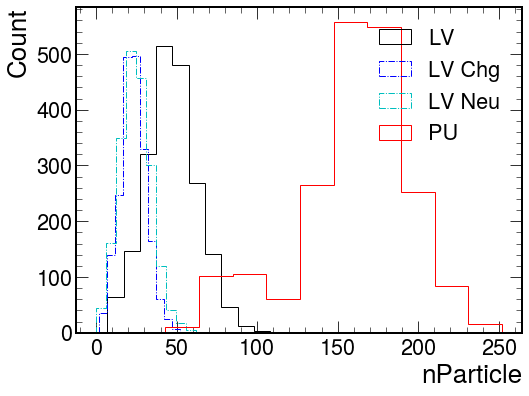

In [57]:
nLV = np.count_nonzero((events[:,:,0]>0) & (events[:,:,4]==0), axis=1)
nPU = np.count_nonzero((events[:,:,0]>0) & (events[:,:,4]!=0), axis=1)
nLV_chg = np.count_nonzero((events[:,:,0]>0) & (events[:,:,4]==0) & (events[:,:,3]!=0), axis=1)
nLV_neu = np.count_nonzero((events[:,:,0]>0) & (events[:,:,4]==0) & (events[:,:,3]==0), axis=1)
nPU_chg = np.count_nonzero((events[:,:,0]>0) & (events[:,:,4]!=0) & (events[:,:,3]!=0), axis=1)
nPU_neu = np.count_nonzero((events[:,:,0]>0) & (events[:,:,4]!=0) & (events[:,:,3]==0), axis=1)

plt.figure(figsize=(8,6))
plt.hist(nLV, histtype='step', color='black', label='LV')
plt.hist(nLV_chg, histtype='step', color='b', label='LV Chg', ls='-.')
plt.hist(nLV_neu, histtype='step', color='c', label='LV Neu', ls='-.')
plt.hist(nPU, histtype='step', color='red',   label='PU')
#plt.hist(nPU_chg, histtype='step', color='darkorange', label='LV Chg', ls='-.')
#plt.hist(nPU_neu, histtype='step', color='magenta', label='LV Neu', ls='-.')
plt.xlabel('nParticle')
plt.ylabel('Count')
plt.legend()
plt.show()

In [77]:
PLV = events[(events[:,:,0]>0) & (events[:,:,4]==0)]
PPU = events[(events[:,:,0]>0) & (events[:,:,4]!=0)]
PLV_chg = events[(events[:,:,0]>0) & (events[:,:,4]==0) & (events[:,:,3]!=0)]
PLV_neu = events[(events[:,:,0]>0) & (events[:,:,4]==0) & (events[:,:,3]==0)]
PPU_chg = events[(events[:,:,0]>0) & (events[:,:,4]!=0) & (events[:,:,3]!=0)]
PPU_neu = events[(events[:,:,0]>0) & (events[:,:,4]!=0) & (events[:,:,3]==0)]

Plot the pt distributions of charged and neutral particles from leading vertex and pileup

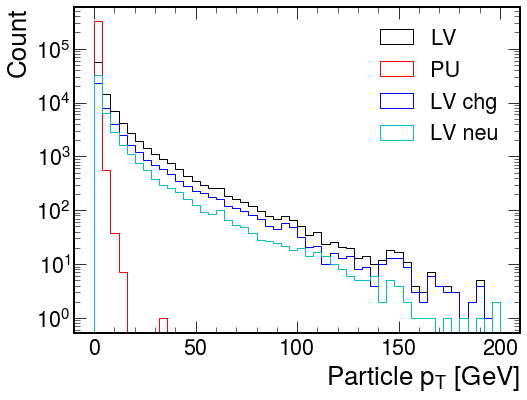

In [80]:
plt.figure(figsize=(8,6))
plt.hist(PLV[:,0], bins=50, range=(0,200), histtype='step', color='black', label='LV')
plt.hist(PPU[:,0], bins=50, range=(0,200), histtype='step', color='red',   label='PU')
plt.hist(PLV_chg[:,0], bins=50, range=(0,200), histtype='step', color='b', label='LV chg')
plt.hist(PLV_neu[:,0], bins=50, range=(0,200), histtype='step', color='c',   label='LV neu')
#plt.hist(PPU_chg[:,0], bins=50, range=(0,200), histtype='step', color='black', label='LV chg')
#plt.hist(PPU_neu[:,0], bins=50, range=(0,200), histtype='step', color='red',   label='PU neu')
plt.yscale('log')
plt.xlabel(r'Particle $p_{T}$ [GeV]')
plt.ylabel('Count')
plt.legend()
plt.show()

Plot the eta distribution of charged and neutral particles from LV and pileup

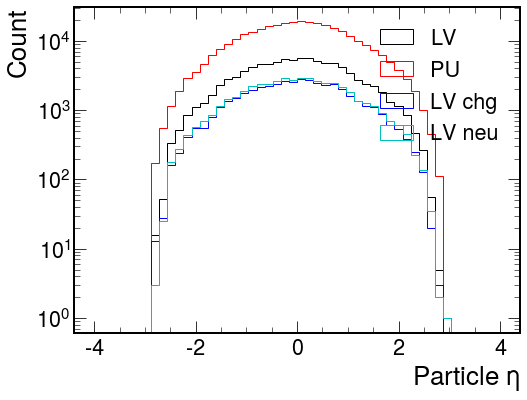

In [84]:
plt.figure(figsize=(8,6))
plt.hist(PLV[:,1], bins=50, range=(-4,4), histtype='step', color='black', label='LV')
plt.hist(PPU[:,1], bins=50, range=(-4,4), histtype='step', color='red',   label='PU')
plt.hist(PLV_chg[:,1], bins=50, range=(-4,4), histtype='step', color='b', label='LV chg')
plt.hist(PLV_neu[:,1], bins=50, range=(-4,4), histtype='step', color='c',   label='LV neu')
#plt.hist(PPU_chg[:,0], bins=50, range=(0,200), histtype='step', color='black', label='LV chg')
#plt.hist(PPU_neu[:,0], bins=50, range=(0,200), histtype='step', color='red',   label='PU neu')
plt.yscale('log')
plt.xlabel(r'Particle $\eta$')
plt.ylabel('Count')
plt.legend()
plt.show()

Plot the phi distribution of charged and neutral particles from LV and pileup

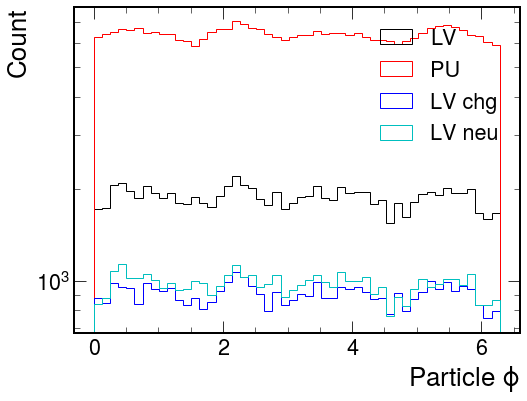

In [87]:
plt.figure(figsize=(8,6))
plt.hist(PLV[:,2], bins=50, range=(0,2*3.142), histtype='step', color='black', label='LV')
plt.hist(PPU[:,2], bins=50, range=(0,2*3.142), histtype='step', color='red',   label='PU')
plt.hist(PLV_chg[:,2], bins=50, range=(0,2*3.142), histtype='step', color='b', label='LV chg')
plt.hist(PLV_neu[:,2], bins=50, range=(0,2*3.142), histtype='step', color='c',   label='LV neu')
#plt.hist(PPU_chg[:,0], bins=50, range=(0,200), histtype='step', color='black', label='LV chg')
#plt.hist(PPU_neu[:,0], bins=50, range=(0,200), histtype='step', color='red',   label='PU neu')
plt.yscale('log')
plt.xlabel(r'Particle $\phi$')
plt.ylabel('Count')
plt.legend()
plt.show()

Plot the PUPPI weights of charged and neutral particles from LV and pileup

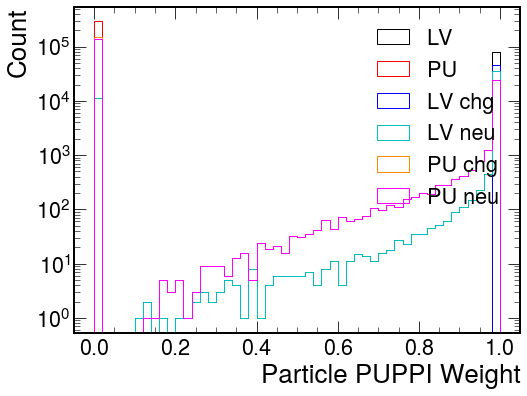

In [89]:
plt.figure(figsize=(8,6))
plt.hist(PLV[:,5], bins=50, range=(0,1), histtype='step', color='black', label='LV')
plt.hist(PPU[:,5], bins=50, range=(0,1), histtype='step', color='red',   label='PU')
plt.hist(PLV_chg[:,5], bins=50, range=(0,1), histtype='step', color='b', label='LV chg')
plt.hist(PLV_neu[:,5], bins=50, range=(0,1), histtype='step', color='c',   label='LV neu')
plt.hist(PPU_chg[:,5], bins=50, range=(0,1), histtype='step', color='darkorange', label='PU chg')
plt.hist(PPU_neu[:,5], bins=50, range=(0,1), histtype='step', color='magenta',   label='PU neu')
plt.yscale('log')
plt.xlabel(r'Particle PUPPI Weight')
plt.ylabel('Count')
plt.legend()
plt.show()